# Predicition of the jet engine RUL

В течение срока службы компоненты самолета подвержены деградации, что напрямую влияет на их надежность и производительность.  
Этот проект машинного обучения будет направлен на создание основы для прогнозирования оставшегося срока службы самолета (RUL)  
на основе данных всего жизненного цикла, чтобы обеспечить необходимое поведение при техническом обслуживании. 

# Dataset
https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/data

Наборы данных состоят из нескольких многомерных временных рядов. Каждый набор данных далее делится на обучающую и тестовую подгруппы.  
Каждый временной ряд относится к разным двигателям, т. е. можно считать, что данные относятся к парку двигателей одного и того же типа.  
Каждый двигатель запускается с разной степенью начального износа и производственными отклонениями, которые неизвестны пользователю.  
Этот износ и изменения считаются нормальными, т. е. не считаются неисправностью. Существует три рабочих параметра,  
которые существенно влияют на работу двигателя. Эти настройки также включены в данные. 

## Features

    Index Names:
        "engine" : Engine No.
        "cycle" : Time, In Cycles

    Setting Names:
        "setting1" : Operation Setting 1
        "setting2" : Operation Setting 2
        "setting3" : Operation Setting 3

    Sensor Names:
        "sensor1" : Fan Inlet Temperature (◦R)
        "sensor2" : LPC Outlet Temperature (◦R)
        "sensor3" : HPC Outlet Temperature (◦R)
        "sensor4" : LPT Outlet Temperature (◦R)
        "sensor5" : Fan Inlet Pressure (psia)
        "sensor6" : Bypass-Duct Pressure (psia)
        "sensor7" : HPC Outlet Pressure (psia)
        "sensor8" : Physical Fan Speed (rpm)
        "sensor9" : Physical Core Speed (rpm)
        "sensor10" : Engine Pressure Ratio(P50/P2)
        "sensor11" : HPC Outlet Static Pressure (psia)
        "sensor12" : Ratio of Fuel Flow to Ps30 (pps/psia)
        "sensor13" : Corrected Fan Speed (rpm)
        "sensor14" : Corrected Core Speed (rpm)
        "sensor15" : Bypass Ratio
        "sensor16" : Burner Fuel-Air Ratio
        "sensor17" : Bleed Enthalpy
        "sensor18" : Required Fan Speed
        "sensor19" : Required Fan Conversion Speed
        "sensor20" : High-Pressure Turbines Cool Air Flow
        "sensor21" : Low-Pressure Turbines Cool Air Flow


![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Turbofan_operation.svg/450px-Turbofan_operation.svg.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

import warnings
warnings.filterwarnings("ignore")

In [2]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [ 
    "(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio(P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)" 
]
col_names = index_names + setting_names + sensor_names

In [3]:
train_data = pd.read_csv('./CMaps/train_FD001.txt', sep='\s+', header=None, index_col=False, names=col_names)
test_data  = pd.read_csv('./CMaps/test_FD001.txt', sep='\s+', header=None, index_col=False, names=col_names)
y          = pd.read_csv('./CMaps/RUL_FD001.txt', sep='\s+', header=None, index_col=False, names=['RUL'])

# EDA

In [4]:
train_data

,unit_number,time_cycles,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [5]:
train_data.isna().sum()

unit_number                                0
time_cycles                                0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

Рассмотрим распределение кол-ва циклов, перед поломокой двигаталей 

In [6]:
train_data.loc[:,['time_cycles']].describe()

,time_cycles
count,20631.000000
mean,108.807862
std,68.880990
min,1.000000
25%,52.000000
50%,104.000000
75%,156.000000
max,362.000000


Text(0.5, 9.444444444444459, 'max time cycle')

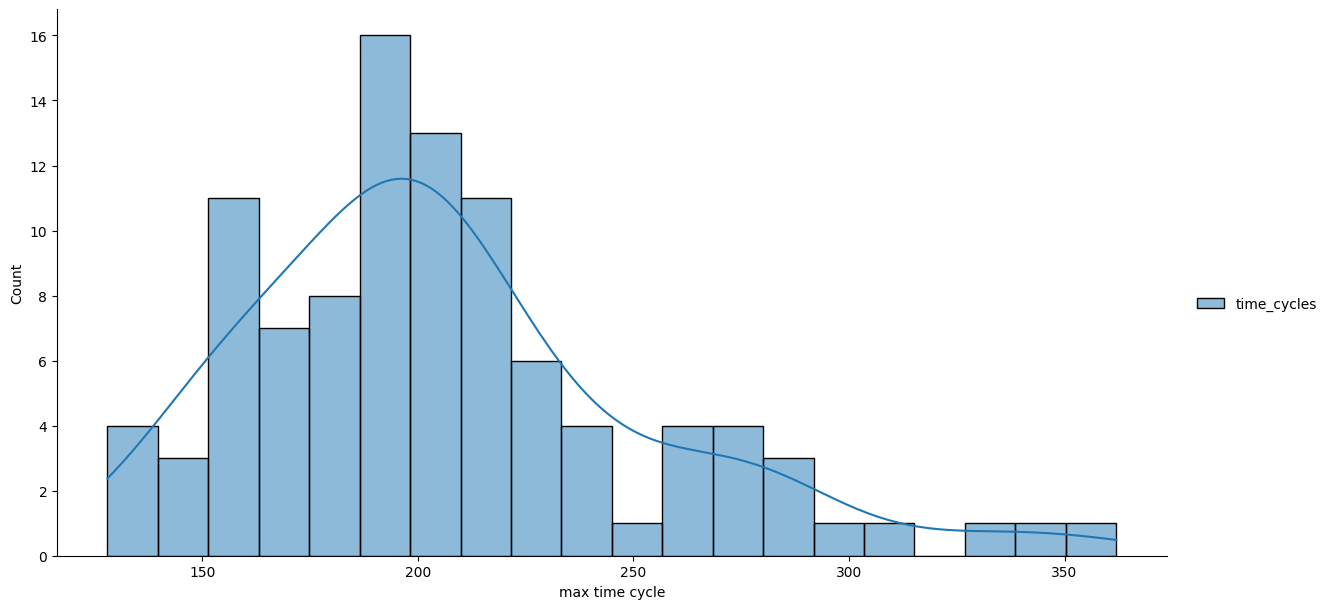

In [7]:
sns.displot(train_data[index_names].groupby('unit_number').max(), kde=True, bins=20, height=6, aspect=2)
plt.xlabel('max time cycle')

Видим, что в большенстве случаев максимальное кол-во циклов до отказа двигателя (190 - 210)

Добавим целевую переменную к train_data

In [8]:
def add_RUL(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number', right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

train_data = add_RUL(train_data)

Оценим корреляцию фичей

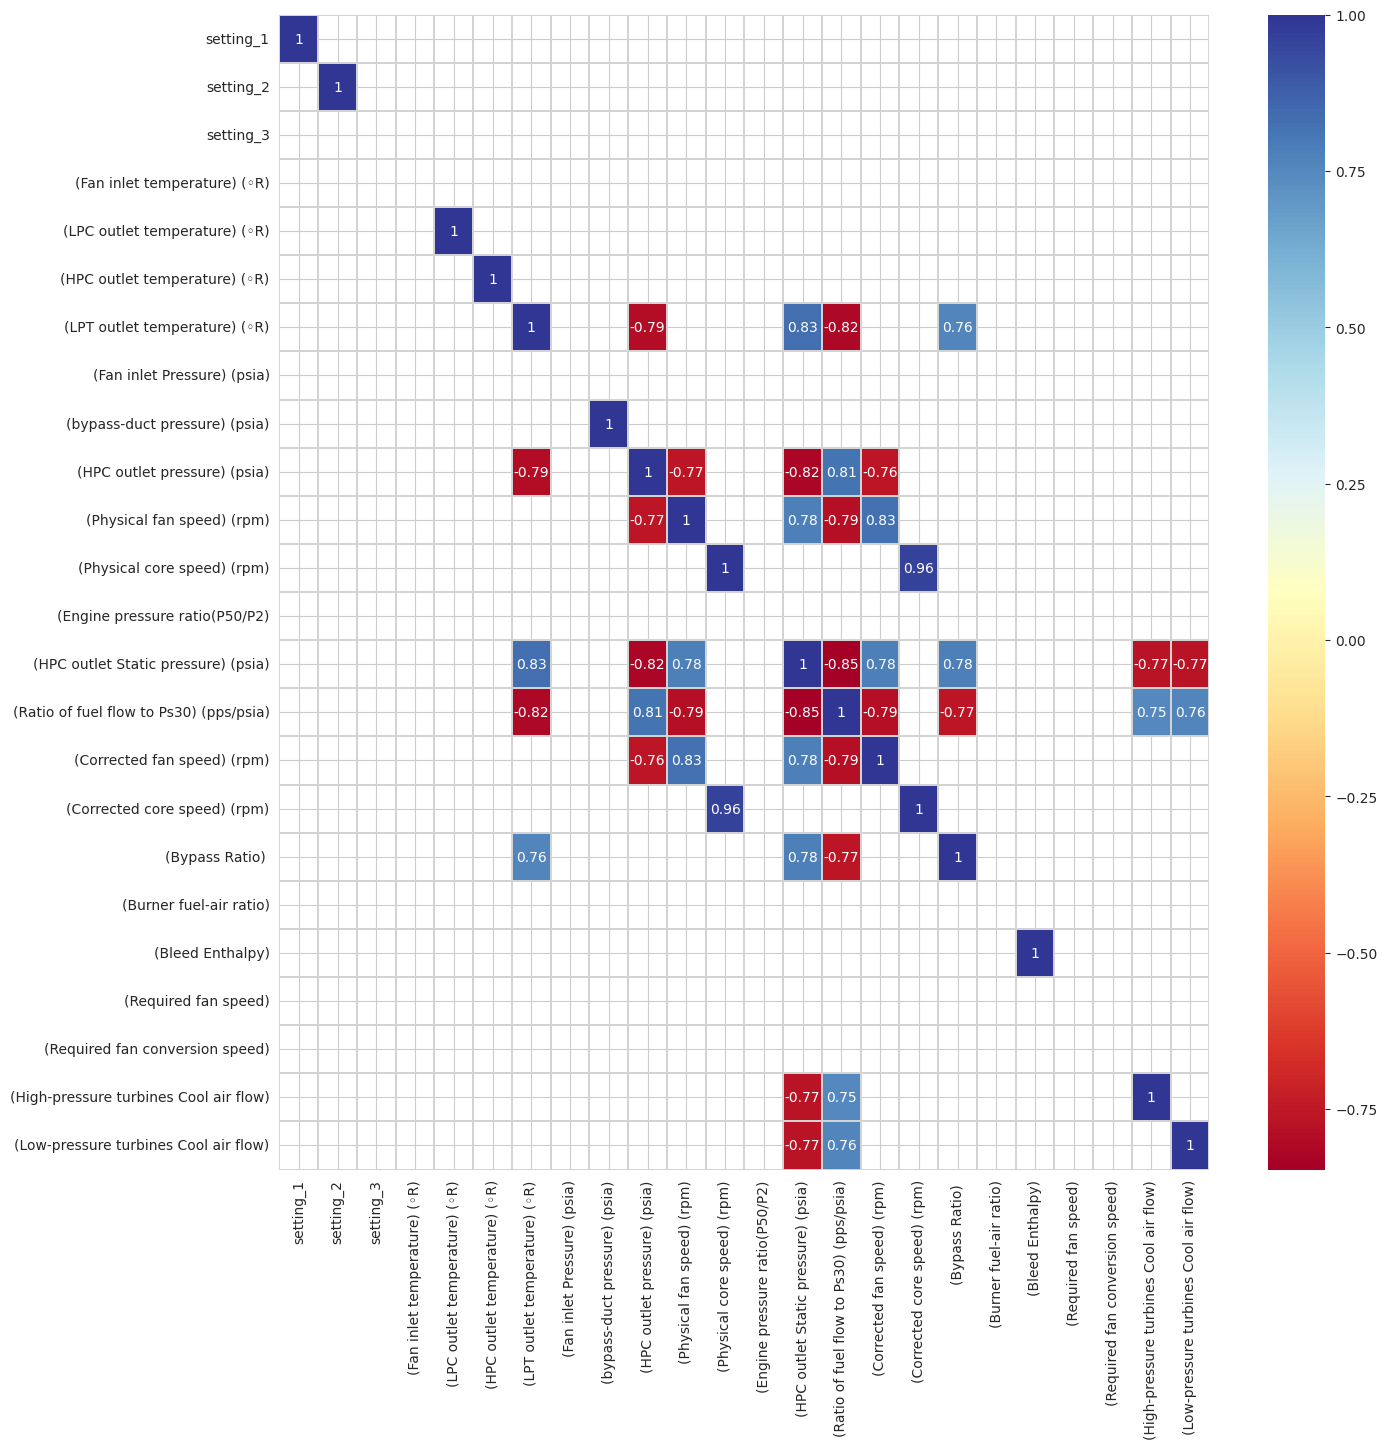

In [9]:
plt.figure(figsize=(15, 15))
threshold = 0.75
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_corr = train_data[setting_names + sensor_names].corr()
mask = df_corr.where((abs(df_corr) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(
    df_corr,
    cmap='RdYlBu',
    annot=True,
    mask=mask,
    linewidths=0.2, 
    linecolor='lightgrey'
).set_facecolor('white')

Удалим столбцы с высокой корреляцией

In [10]:
cor_matrix = df_corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(corr_features)
train_data.drop(corr_features, axis=1, inplace=True)
test_data.drop(corr_features, axis=1, inplace=True)

['(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Corrected core speed) (rpm)', '(Bypass Ratio) ', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


Посмотрим на сигналы датчиков

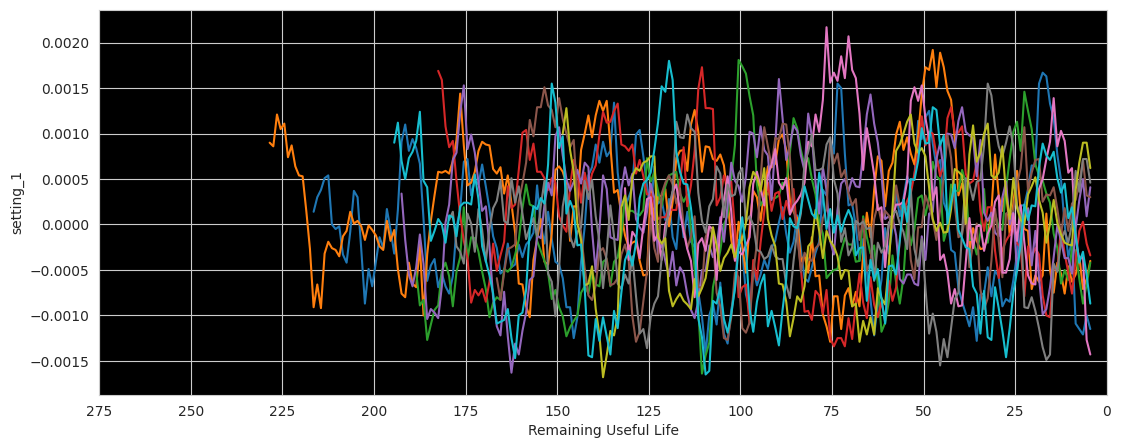

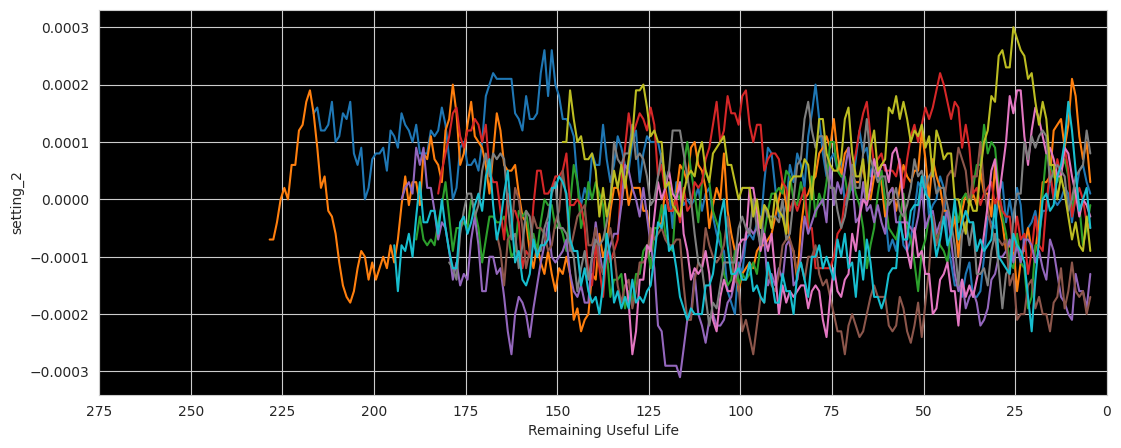

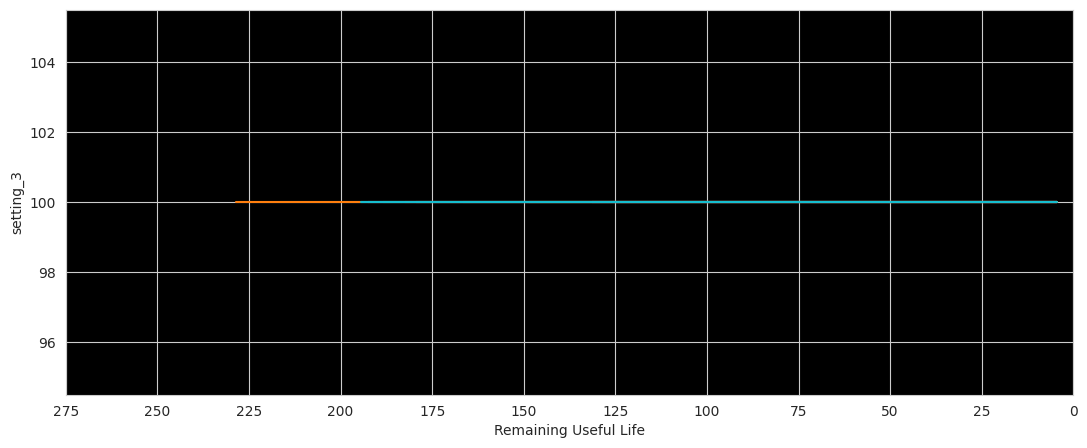

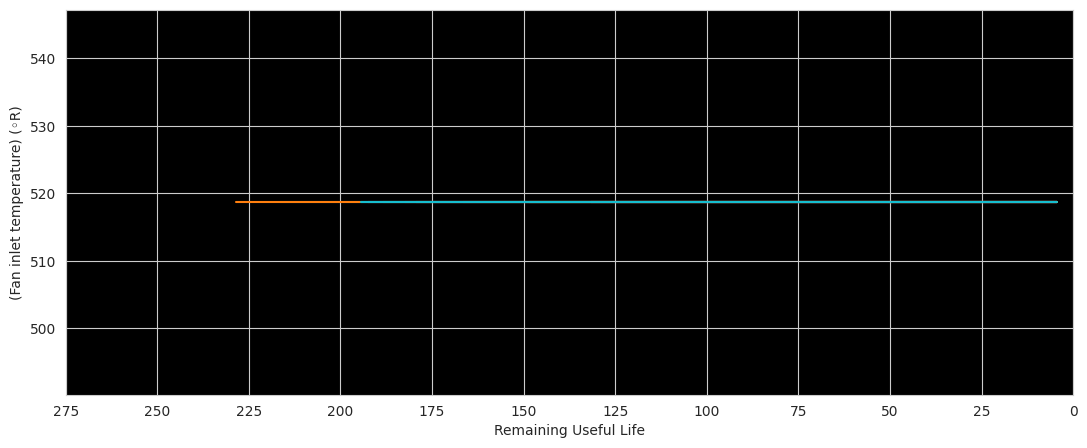

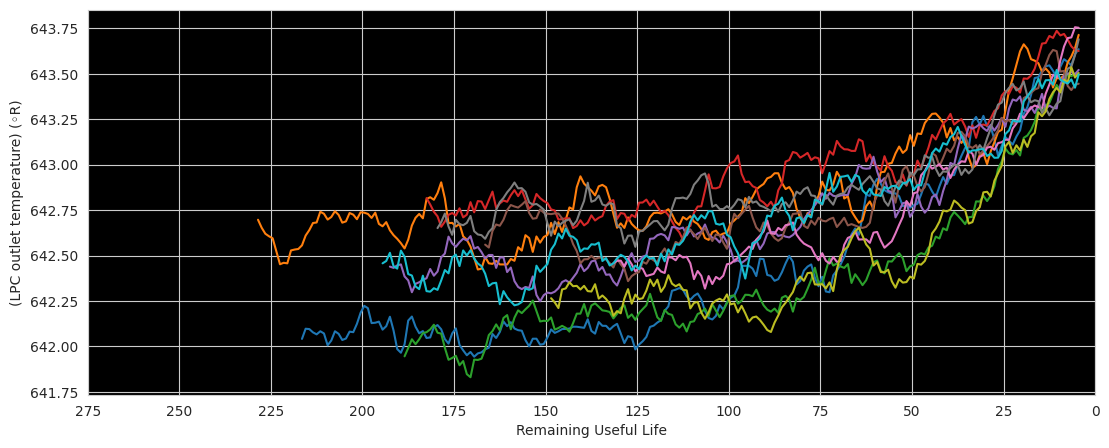

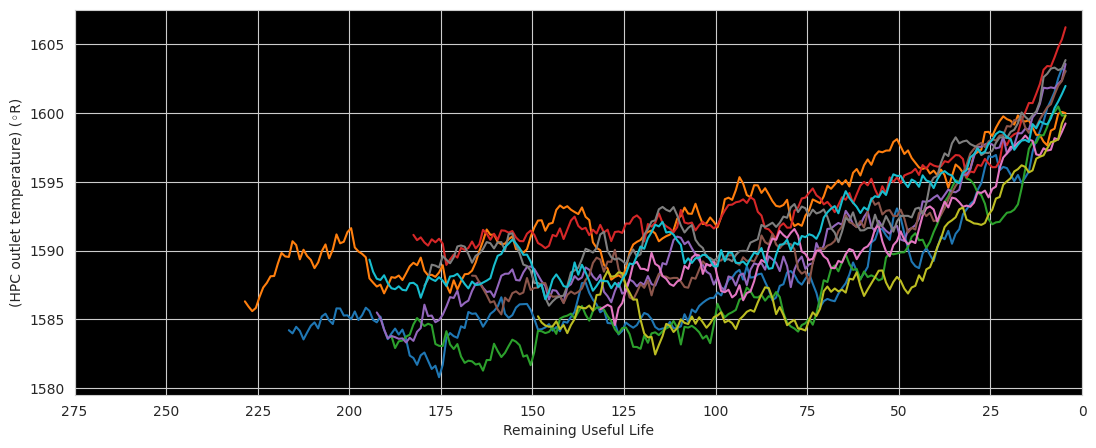

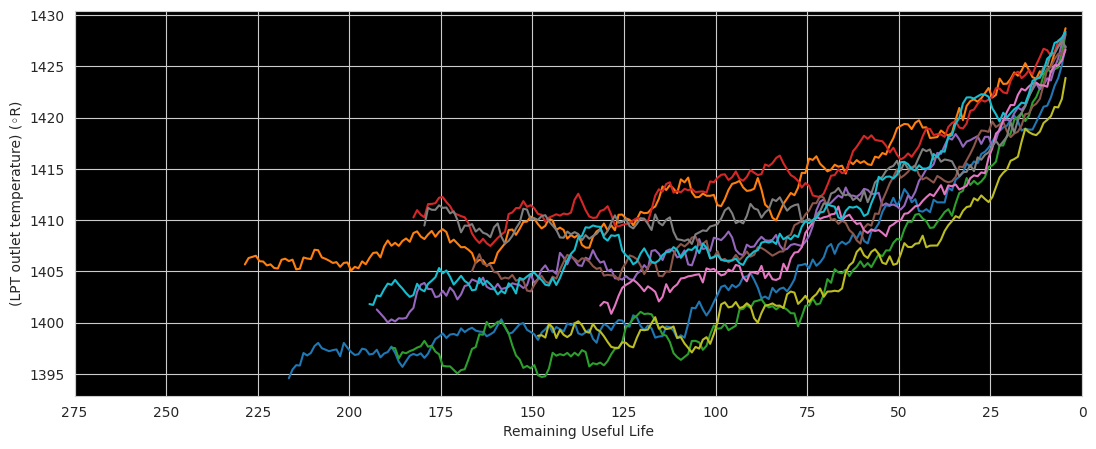

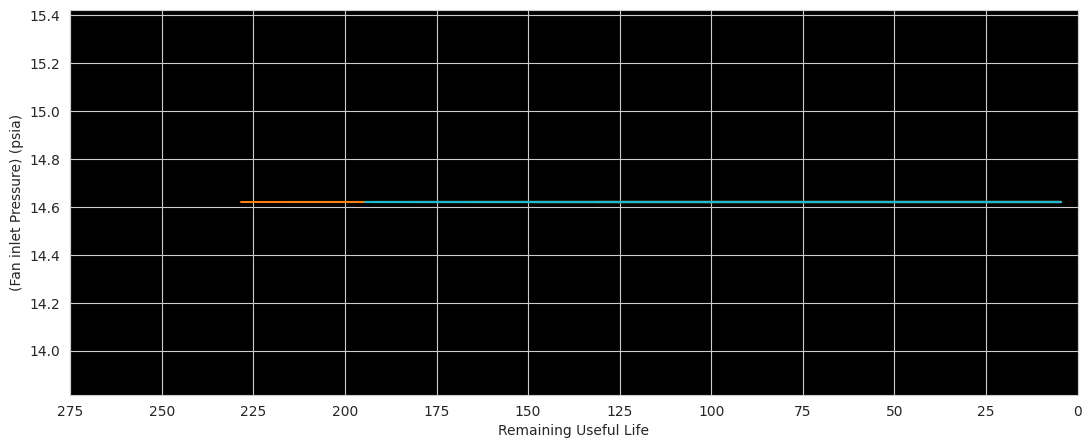

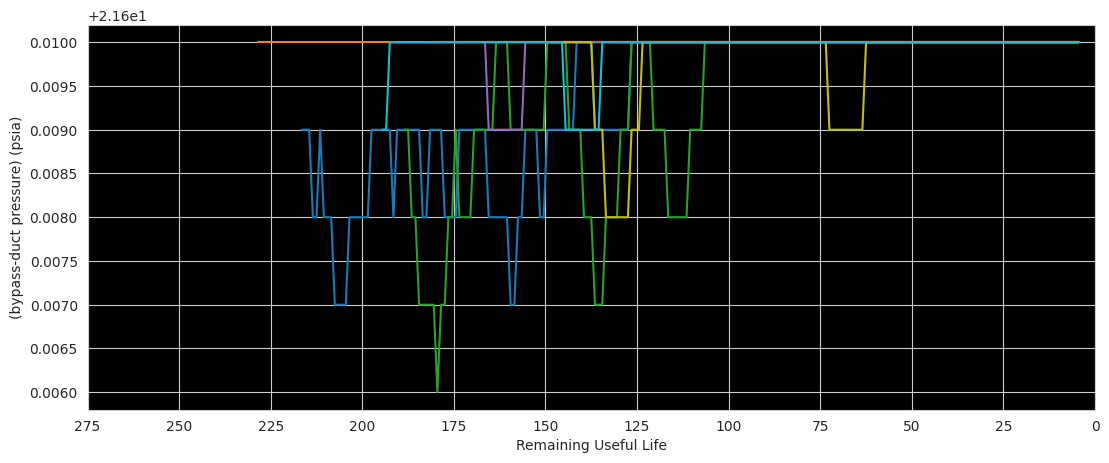

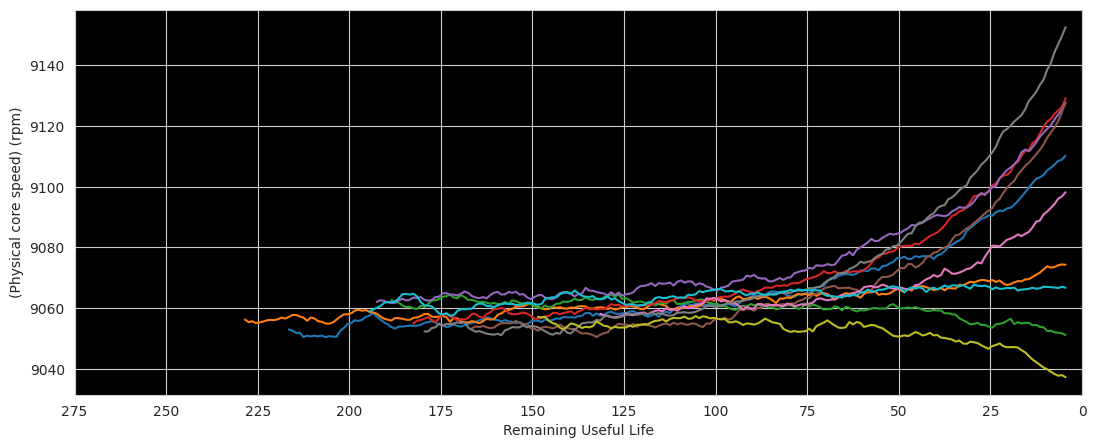

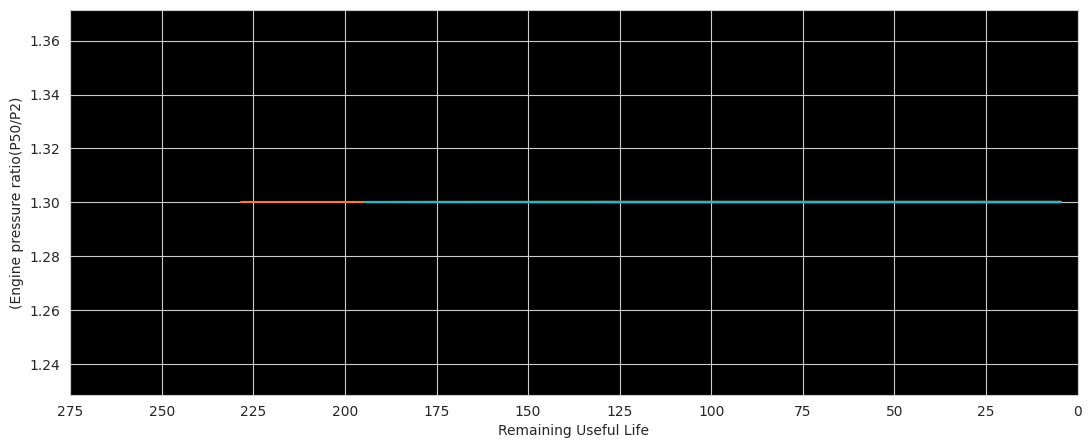

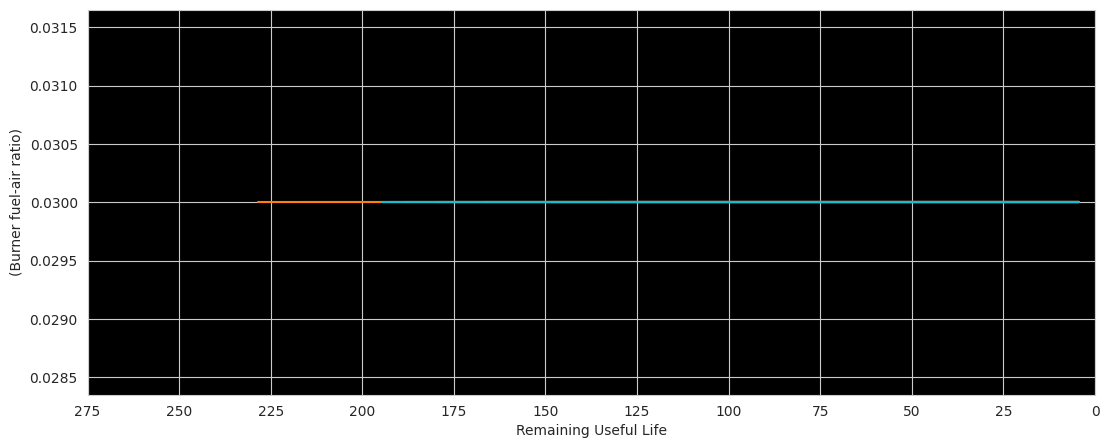

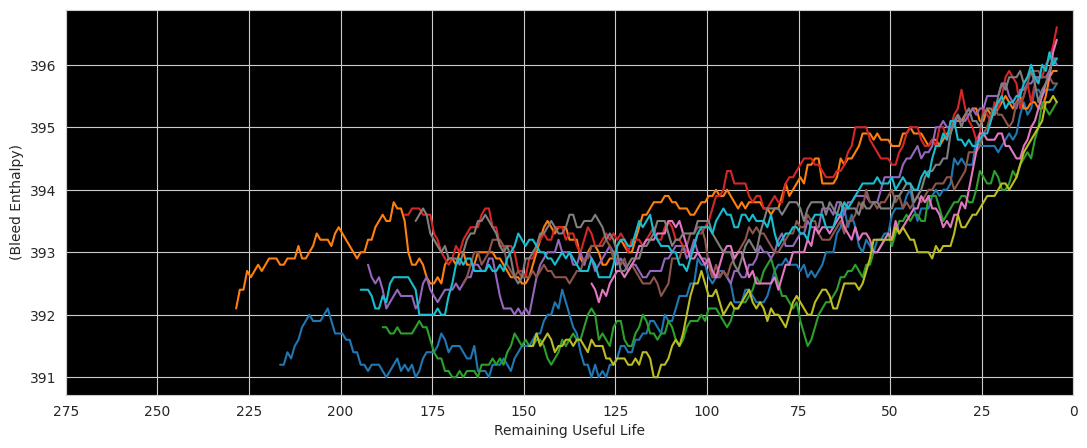

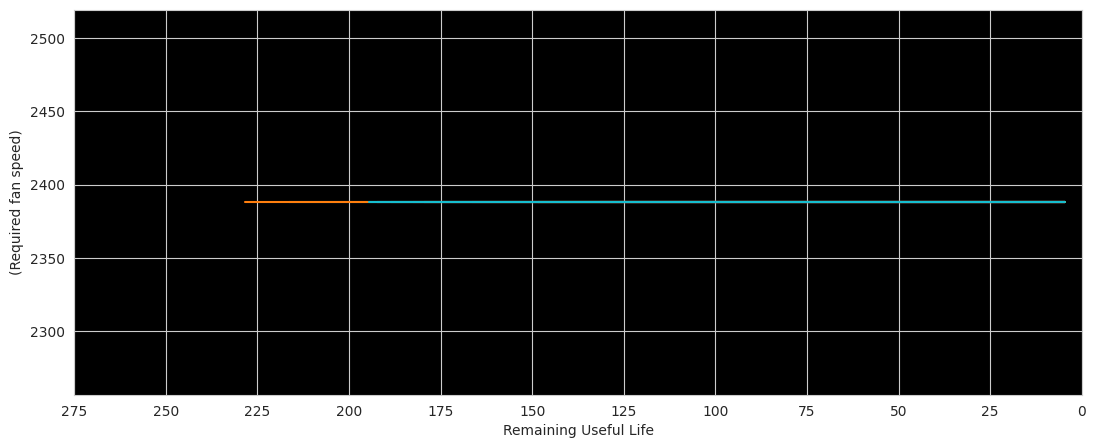

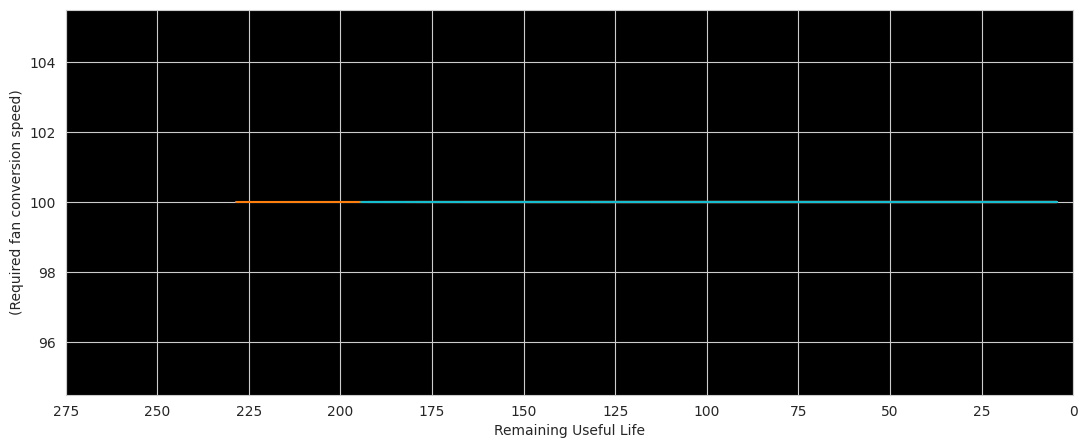

In [11]:
plot_data_columns = train_data.copy().drop(index_names + ['RUL'], axis=1).columns

for column_name in plot_data_columns:
    plt.figure(figsize=(13,5))
    for i in train_data['unit_number'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', column_name, data=train_data[train_data['unit_number']==i].rolling(10).mean())
    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(column_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

Видим, что некоторые сигналы являются постоянными - удалим их из датасета

In [12]:
const_signals = [feature for feature in plot_data_columns if train_data[feature].min() == train_data[feature].max()]
const_signals.append('(bypass-duct pressure) (psia)')
train_data.drop(const_signals, axis=1, inplace=True)
test_data.drop(const_signals, axis=1, inplace=True)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Turbofan_operation.svg/450px-Turbofan_operation.svg.png)

In [13]:
train_data

,unit_number,time_cycles,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Physical core speed) (rpm),(Bleed Enthalpy),RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,9046.19,392,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,9044.07,392,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,9052.94,390,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,9049.48,392,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,9055.15,393,187
...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,9065.52,397,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,9065.11,395,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,9065.90,398,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,9073.72,395,1


Добавим лаги для каждого временного ряда. Количество лагов возьмем равным 100, так-как минимальное кол-во циклов работы двигателя ~ 150 дней

In [14]:
NUM_LAGS = 100
columns_to_lag = [
    'setting_1',
    'setting_2',
    '(LPC outlet temperature) (◦R)',
    '(HPC outlet temperature) (◦R)',
    '(LPT outlet temperature) (◦R)',
    '(Physical core speed) (rpm)',
    '(Bleed Enthalpy)',
]

def create_lags(data, lags, column):
    position = data.columns.get_loc(column)  # Изначальная позиция столбца
    for lag in range(1, lags + 1):
        lagged_column = data[column].shift(lag)
        lagged_column_name = f"{column}_lag_{lag}"
        # Вставляем лаг непосредственно перед исходным столбцом
        data.insert(position, lagged_column_name, lagged_column)
    return data

def data_with_lags(df):
    df_lagged = pd.DataFrame()
    for unit in df['unit_number'].unique():
        unit_data = df[df['unit_number'] == unit].copy()
        for column in columns_to_lag:
            unit_data = create_lags(unit_data, NUM_LAGS, column)
        # Удаляем строки с NaN значениями, которые появляются из-за сдвига
        unit_data = unit_data.dropna().reset_index(drop=True)
        # Объединяем данные
        df_lagged = pd.concat([df_lagged, unit_data], axis=0)
    return df_lagged.reset_index(drop=True)

Разделим тестовый датасет на test и val

In [15]:
from sklearn.model_selection import train_test_split

def make_val_test_data(data, target):
    target['unit_number'] = target.index + 1
    # Добавляем RUL к каждому циклу для каждого unit_number
    data = data.merge(target, on='unit_number', how='left')
    # Вычисляем RUL для каждого цикла
    data['RUL'] = data.groupby('unit_number')['RUL'].transform(lambda x: x.max()) - \
                  data['time_cycles'] + \
                  data.groupby('unit_number')['time_cycles'].transform('max')
    unique_units = data['unit_number'].unique()
    test_units, val_units = train_test_split(unique_units, test_size=0.3, random_state=RANDOM_SEED)

    test_df = data[data['unit_number'].isin(test_units)]
    val_df = data[data['unit_number'].isin(val_units)]

    return test_df, val_df

test_data, val_data = make_val_test_data(test_data, y)

In [16]:
train_data = data_with_lags(train_data)
test_data = data_with_lags(test_data)
val_data = data_with_lags(val_data)

In [19]:
val_data

,unit_number,time_cycles,setting_1_lag_100,setting_1_lag_99,setting_1_lag_98,setting_1_lag_97,setting_1_lag_96,setting_1_lag_95,setting_1_lag_94,setting_1_lag_93,...,(Bleed Enthalpy)_lag_8,(Bleed Enthalpy)_lag_7,(Bleed Enthalpy)_lag_6,(Bleed Enthalpy)_lag_5,(Bleed Enthalpy)_lag_4,(Bleed Enthalpy)_lag_3,(Bleed Enthalpy)_lag_2,(Bleed Enthalpy)_lag_1,(Bleed Enthalpy),RUL
0,10,101,-0.0017,0.0061,0.0027,-0.0028,0.0013,-0.0007,0.0006,0.0024,...,392.0,393.0,392.0,392.0,391.0,392.0,393.0,391.0,392,187
1,10,102,0.0061,0.0027,-0.0028,0.0013,-0.0007,0.0006,0.0024,-0.0006,...,393.0,392.0,392.0,391.0,392.0,393.0,391.0,392.0,391,186
2,10,103,0.0027,-0.0028,0.0013,-0.0007,0.0006,0.0024,-0.0006,-0.0008,...,392.0,392.0,391.0,392.0,393.0,391.0,392.0,391.0,391,185
3,10,104,-0.0028,0.0013,-0.0007,0.0006,0.0024,-0.0006,-0.0008,0.0017,...,392.0,391.0,392.0,393.0,391.0,392.0,391.0,391.0,394,184
4,10,105,0.0013,-0.0007,0.0006,0.0024,-0.0006,-0.0008,0.0017,-0.0025,...,391.0,392.0,393.0,391.0,392.0,391.0,391.0,394.0,394,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,97,130,-0.0006,0.0042,0.0018,0.0017,-0.0026,-0.0028,-0.0023,-0.0052,...,391.0,393.0,393.0,393.0,393.0,394.0,392.0,392.0,393,86
1421,97,131,0.0042,0.0018,0.0017,-0.0026,-0.0028,-0.0023,-0.0052,-0.0021,...,393.0,393.0,393.0,393.0,394.0,392.0,392.0,393.0,395,85
1422,97,132,0.0018,0.0017,-0.0026,-0.0028,-0.0023,-0.0052,-0.0021,0.0016,...,393.0,393.0,393.0,394.0,392.0,392.0,393.0,395.0,393,84
1423,97,133,0.0017,-0.0026,-0.0028,-0.0023,-0.0052,-0.0021,0.0016,-0.0004,...,393.0,393.0,394.0,392.0,392.0,393.0,395.0,393.0,392,83


In [20]:
drop_for_X = [
    'unit_number',
    'time_cycles',
    'RUL'
]

X_train, y_train = train_data.drop(drop_for_X, axis=1), train_data['RUL']
X_test, y_test = test_data.drop(drop_for_X, axis=1), test_data['RUL']
X_val, y_val = val_data.drop(drop_for_X, axis=1), val_data['RUL']

Функция для расчета ошибок

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def error(y_true, y):
    print('MAE:', mean_absolute_error(y_true, y))
    print('MAPE:',mean_absolute_percentage_error(y_true, y))
    print('MSE:', mean_squared_error(y_true, y, squared=False))

# LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)

In [30]:
error(y_test, lr_pred)

MAE: 24.513304502514632
MAPE: 0.3200439315402839
MSE: 32.393439990412276


# Boosting

In [33]:
import xgboost as xgb

model = xgb.XGBRFRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

boosting_pred = model.predict(X_test)

MAE: 22.59568923620268
MAPE: 0.2632194513276076
MSE: 30.494324180688643
